<a href="https://colab.research.google.com/github/jordan-dsouza/CodeClauseInternship_Projects/blob/main/Telecom_Churn_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
sns.set()

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashishkumarsingh123/telecom-churn-dataset

Saving kaggle.json to kaggle.json
 91% 21.0M/23.2M [00:00<00:00, 109MB/s] 
100% 23.2M/23.2M [00:00<00:00, 104MB/s]


In [ ]:
!unzip telecom-churn-dataset.zip

Archive:  telecom-churn-dataset.zip
  inflating: telecom_churn_data.csv  


In [ ]:
#Displaying data:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
#Shape:
print(df.shape)

(99999, 226)


In [ ]:
#Describing data:
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [ ]:
#Finding null values:
def null_val(df):
  null_num = df[df.columns].isnull().sum().sort_values(ascending=False)
  null_percent = (df[df.columns].isnull().sum()/len(df)*100).sort_values(ascending=False)
  nulls = pd.concat([null_num, null_percent], keys=['Total', '%'], axis=1)
  nulls = nulls[nulls['%']>0]
  return nulls
print(len(null_val(df)))

166


#**Filter high value customers:**
As per dataset, define high-value customers as follows:
Those who have recharged with an amount more than or equal to X,
where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [ ]:
#Total recharge amt= total recharge data * average recharge amount:
df['tot_rech_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['tot_rech_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['tot_rech_amt_data_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['tot_rech_amt_data_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']
#Total amount paid = tot_rech_amt_data_ * total_rech_amt_:
df['tot_amt_6'] = df[['total_rech_amt_6', 'total_rech_amt_6']].sum(axis=1)
df['tot_amt_7'] = df[['total_rech_amt_7', 'total_rech_amt_7']].sum(axis=1)
df['tot_amt_8'] = df[['total_rech_amt_8', 'total_rech_amt_8']].sum(axis=1)
df['tot_amt_9'] = df[['total_rech_amt_9', 'total_rech_amt_9']].sum(axis=1)
#First 2 months average:
df['avg_6_7']= df[['tot_amt_6', 'tot_amt_7']].mean(axis=1)
df=df.loc[(df['avg_6_7'] >= np.percentile(df['avg_6_7'], 70))]
df.shape

(30011, 235)

In [ ]:
#Categorical values:
cat = []
for y in df.columns:
    if len(df[y].unique())== 2 | 3:#categorical values.
        cat.append(y)
# Converting into categorical (object) type:
df[cat]=df[cat].apply(lambda x:x.astype('object'))
col_tmp=['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9','total_rech_data_6',\
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']
df[col_tmp]=df[col_tmp].apply(lambda x:x.astype('object'))

In [ ]:
#Dropping redundant columns:
df.drop(['tot_rech_amt_data_6', 'tot_rech_amt_data_7', 'tot_rech_amt_data_8', 'tot_rech_amt_data_9'], inplace = True, axis = 1)

#**Tagging churners:**

In [ ]:
#Sum of columns = 0, churn = 1, else = 0:
df['churn'] = np.where(df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis=1)==0,1,0)

In [ ]:
#Removing '_9' and 'sep' with regex:
df.drop(df.filter(regex="_9|sep", axis=1).columns, axis = 1, inplace=True)
#Churn %:
pd.DataFrame(round(df['churn'].value_counts(normalize=True)*100,2))

,churn
0,91.36
1,8.64


In [ ]:
df.shape

(30011, 176)

Almost 9% churned, 91% not churned.

#**Removing redundant features:**

In [ ]:
#Redundant contains value present in > 95% rows:
def red_feat(df):
  redundant = []
  for x in df.columns:
    #Unique value count:
    count = df[x].value_counts()
    max_count = count.iloc[0]#Max value
    if (max_count/len(df)*100) > 95:
      redundant.append(x)
  redundant = list(redundant)
  return redundant

In [ ]:
redundant_features = red_feat(df)
df = df.drop(redundant_features, axis = 1)
df.shape

(30011, 161)

In [ ]:
#Replacing nulls with zero, taking cutoff as 40%:
def replace_null(df,col_name):
    for col in col_name:
        df[col].fillna(0,inplace=True)
col_40 = null_val(df)[null_val(df)['%']>40].index
#call function
replace_null(df,col_40)

In [ ]:
#Columns with zero as null value:
pd.DataFrame((df[null_val(df).index]==0).sum()).head(10)

,0
loc_ic_t2f_mou_8,9131
std_ic_t2t_mou_8,12014
std_ic_t2f_mou_8,21368
std_og_t2t_mou_8,11193
std_og_mou_8,5103
loc_og_mou_8,1603
std_ic_t2m_mou_8,6688
loc_og_t2c_mou_8,21426
std_ic_mou_8,4139
isd_og_mou_8,26973


In [ ]:
df.fillna(0, inplace=True)
null_val(df)

,Total,%


In [ ]:
#Mobile numbers dropped since it doesnt help:
df.drop("mobile_number", inplace=True, axis=1)

In [ ]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_amt_6,tot_amt_7,tot_amt_8,avg_6_7,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,802,57.74,19.38,18.74,3160,1580,7276,2370.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1.0,315,21.03,910.65,122.16,874,1202,240,1038.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,1.0,2607,0.00,0.00,0.00,1014,506,1434,760.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,511,0.00,2.45,21.89,1140,696,320,918.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,667,0.00,0.00,0.00,1632,0,60,816.0,0


#**EDA:**

In [ ]:
def dist_plot(df,c1,c2,c3):
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][c1], bins = 40, ax = axes[0], kde = False, color="red")
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][c1], bins = 40, ax = axes[1], kde = False)
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==1][c2], bins = 40, ax = axes[2], kde = False, color="red")
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][c2], bins = 40, ax = axes[3], kde = False)
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][c3], bins = 40, ax = axes[0], kde = False, color="red")
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][c3], bins = 40, ax = axes[1], kde = False)
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    plt.show()

<ipython-input-171-61818b55a0ef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['churn']==1][c1], bins = 40, ax = axes[0], kde = False, color="red")
<ipython-input-171-61818b55a0ef>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['churn']==0][c1], bins = 40, ax = axes[1]

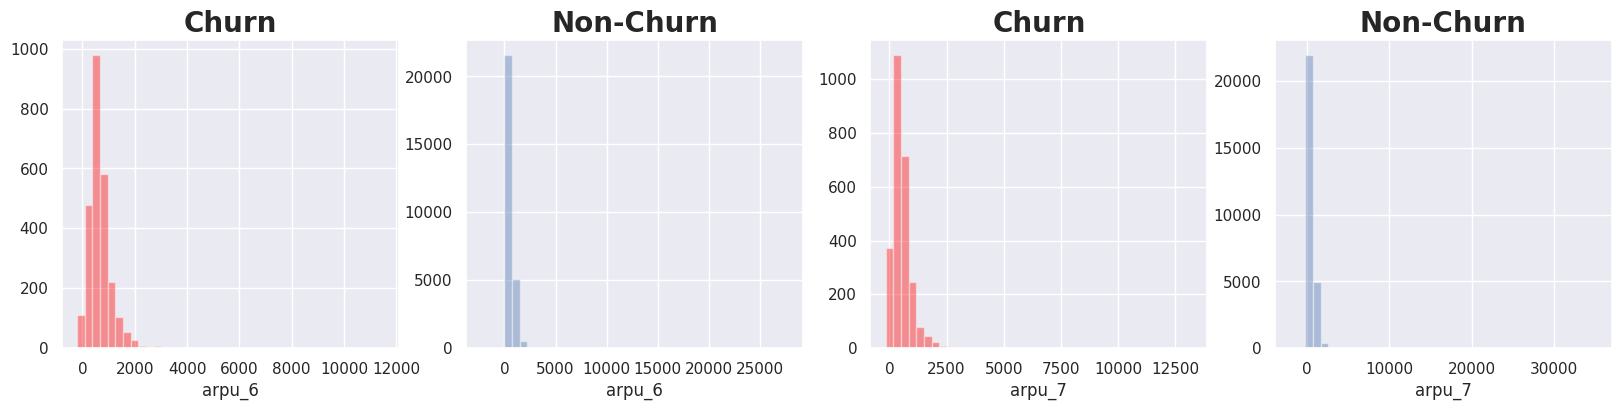

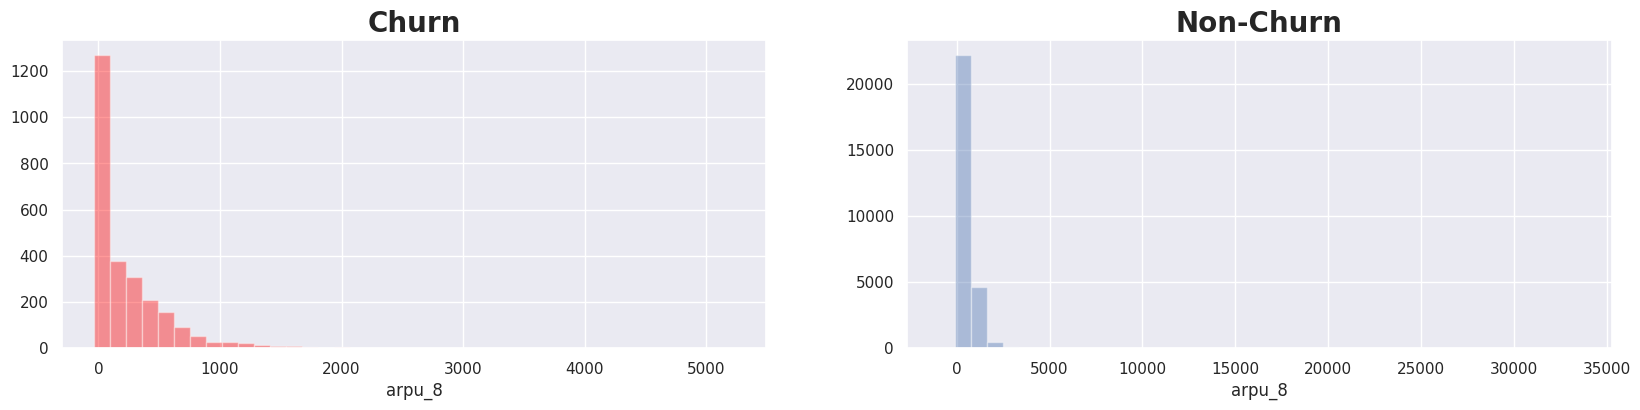

In [ ]:
dist_plot(df, "arpu_6", "arpu_7", "arpu_8")

<ipython-input-75-61818b55a0ef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['churn']==1][c1], bins = 40, ax = axes[0], kde = False, color="red")
<ipython-input-75-61818b55a0ef>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['churn']==0][c1], bins = 40, ax = axes[1], 

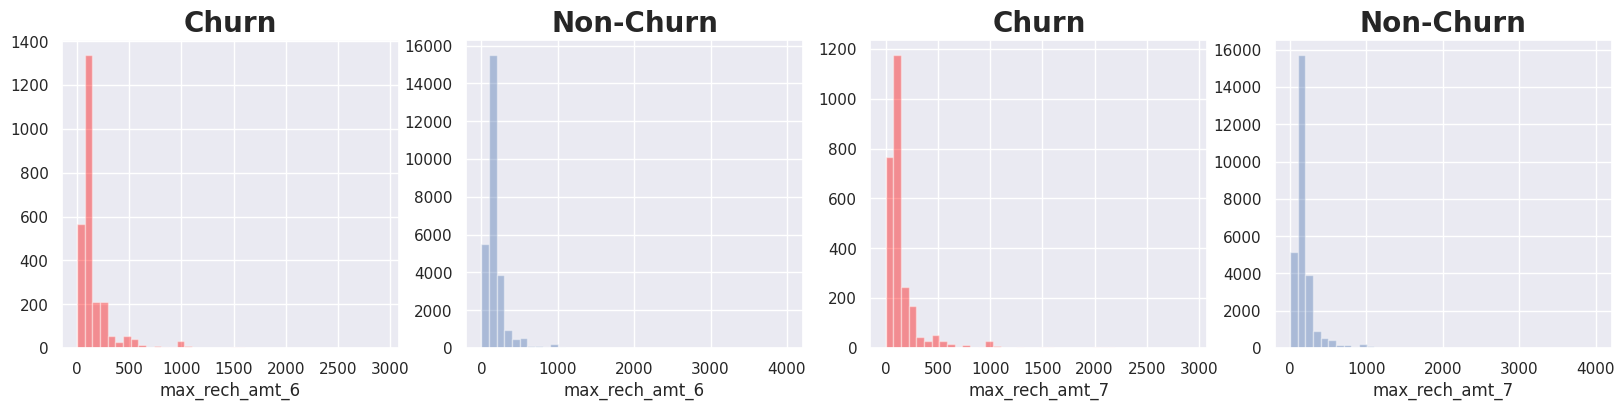

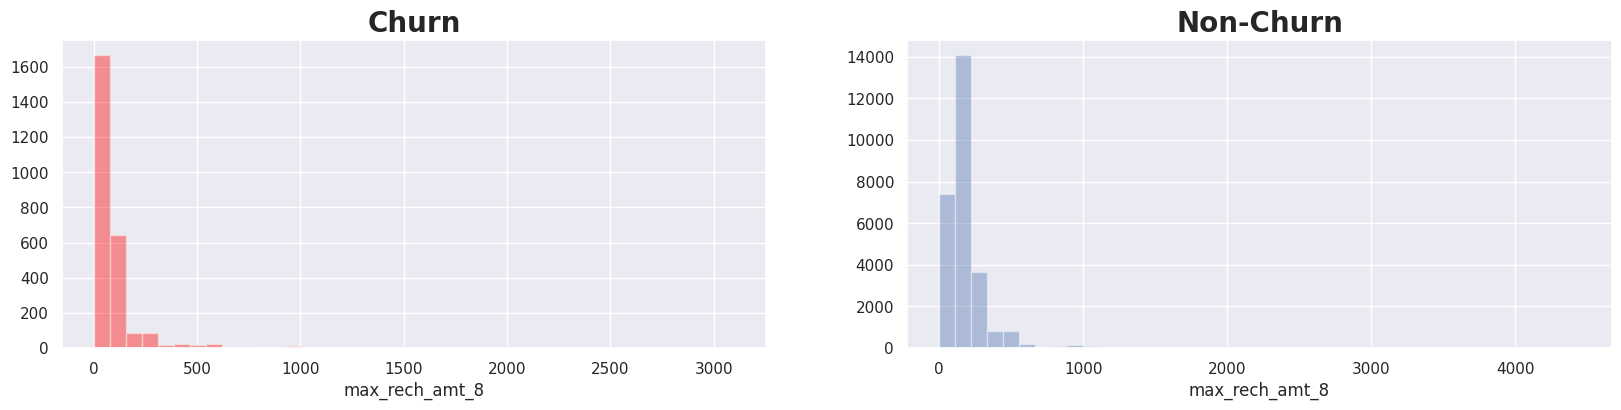

In [ ]:
dist_plot(df, "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8")

<Figure size 500x500 with 0 Axes>

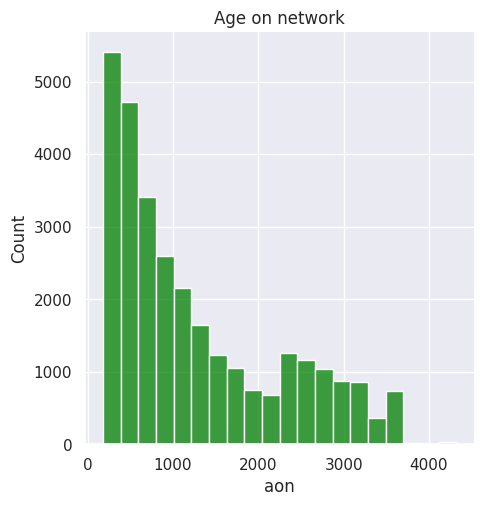

In [ ]:
#Age on network:
plt.figure(figsize=(5,5))
sns.displot(df["aon"], color="green", bins=20)
plt.title("Age on network")
plt.show()

**Ingoing and outgoing info can predict churn:**

In [ ]:
#Total calls months 6-8 ratio:
for i in range(6,9):
  df['tot_og_to_ic_mou_'+str(i)] = df["total_og_mou_"+str(i)]/(df["total_ic_mou_"+str(i)]+1)
#Local calls:
for i in range(6,9):
  df["loc_og_to_ic_mou_" + str(i)] = df["loc_og_mou_"+str(i)]/(df["loc_ic_mou_"+str(i)]+1)
#Roaming calls:
for i in range(6,9):
  df["roam_og_to_ic_mou_" + str(i)] = df["roam_og_mou_"+str(i)]/(df["roam_ic_mou_"+str(i)]+1)
#Special calls:
for i in range(6,9):
  df["spl_og_to_ic_mou_" + str(i)] = df["spl_og_mou_"+str(i)]/(df["spl_ic_mou_"+str(i)]+1)
#Standard calls:
for i in range(6,9):
  df["std_og_to_ic_mou_" + str(i)] = df["std_og_mou_"+str(i)]/(df["std_ic_mou_"+str(i)]+1)
#Isd calls:
for i in range(6,9):
  df["isd_og_to_ic_mou_" + str(i)] = df["isd_og_mou_"+str(i)]/(df["isd_ic_mou_"+str(i)]+1)

In [ ]:
#Churn plot:
def new_churn_plot(data, col):
    fig, ax = plt.subplots(figsize=(5,2))
    colList=list(data.filter(regex=(col)).columns)#Add to list if match to "col".
    colList = colList[:3]
    plt.plot(df.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

<ipython-input-175-4ca9ca0bb1e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug','Sep'])


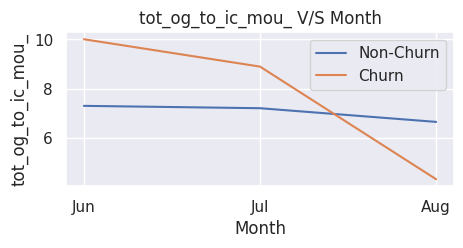

In [ ]:
new_churn_plot(df, "tot_og_to_ic_mou_")

<ipython-input-175-4ca9ca0bb1e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug','Sep'])


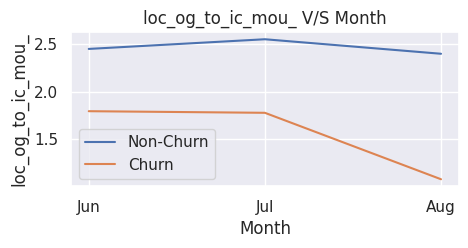

In [ ]:
new_churn_plot(df, "loc_og_to_ic_mou_")

<ipython-input-175-4ca9ca0bb1e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug','Sep'])


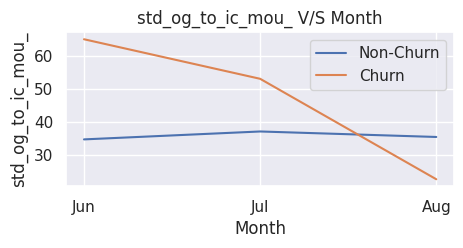

In [ ]:
new_churn_plot(df, "std_og_to_ic_mou_")

<Figure size 1000x600 with 0 Axes>

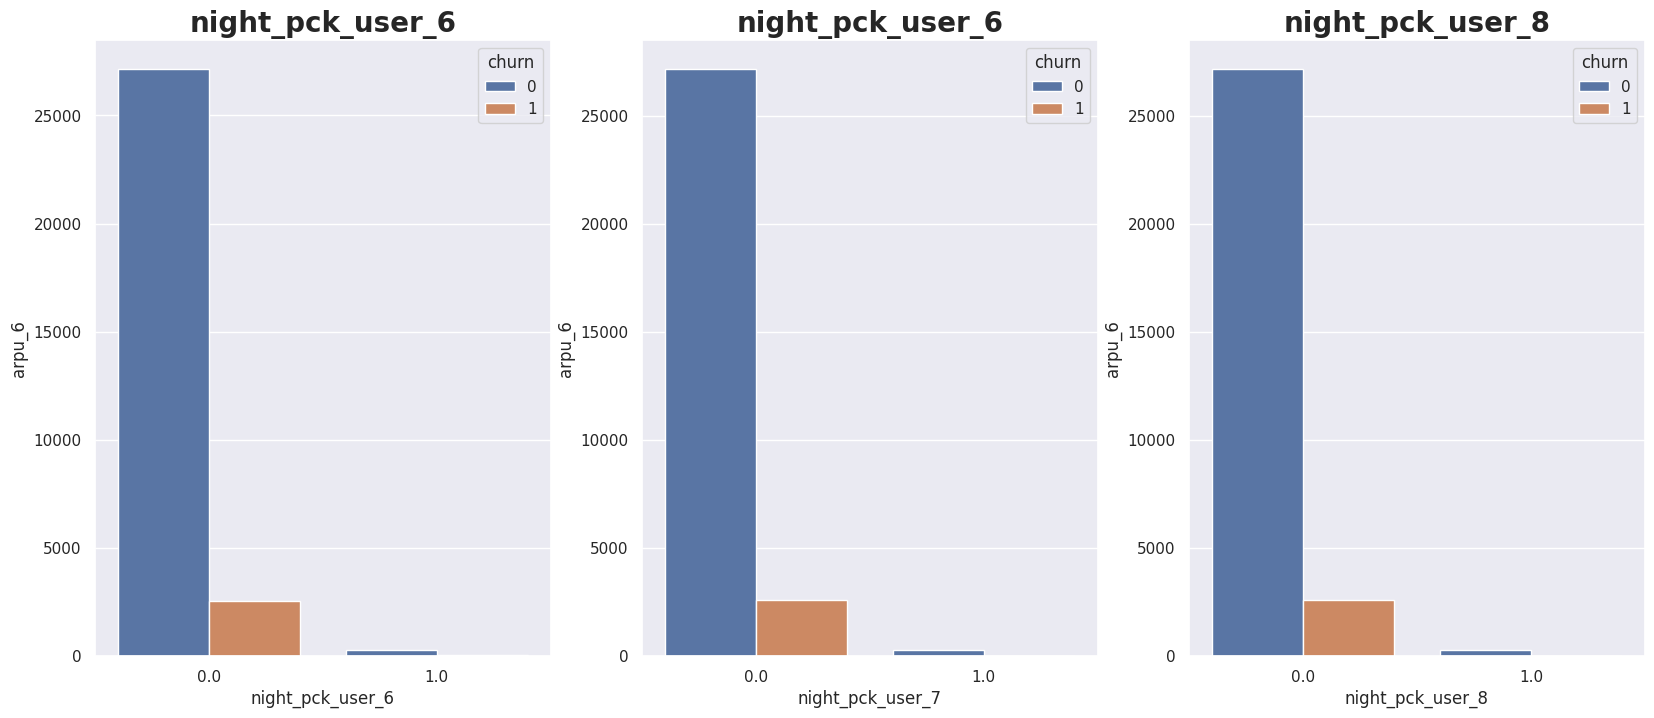

In [ ]:
#Night pack user:
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
temp= pd.DataFrame(df.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=temp['night_pck_user_6'],y=temp['arpu_6'],hue=temp['churn'],ax=axes[0])

ax.set_title('night_pck_user_6',fontweight='bold',size=20)
temp= pd.DataFrame(df.groupby(['night_pck_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=temp['night_pck_user_7'],y=temp['arpu_6'],hue=temp['churn'],ax=axes[1])

ax.set_title('night_pck_user_6',fontweight='bold',size=20)
temp= pd.DataFrame(df.groupby(['night_pck_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=temp['night_pck_user_8'],y=temp['arpu_6'],hue=temp['churn'],ax=axes[2])

ax.set_title('night_pck_user_8',fontweight='bold',size=20)
plt.show()

<Figure size 1000x600 with 0 Axes>

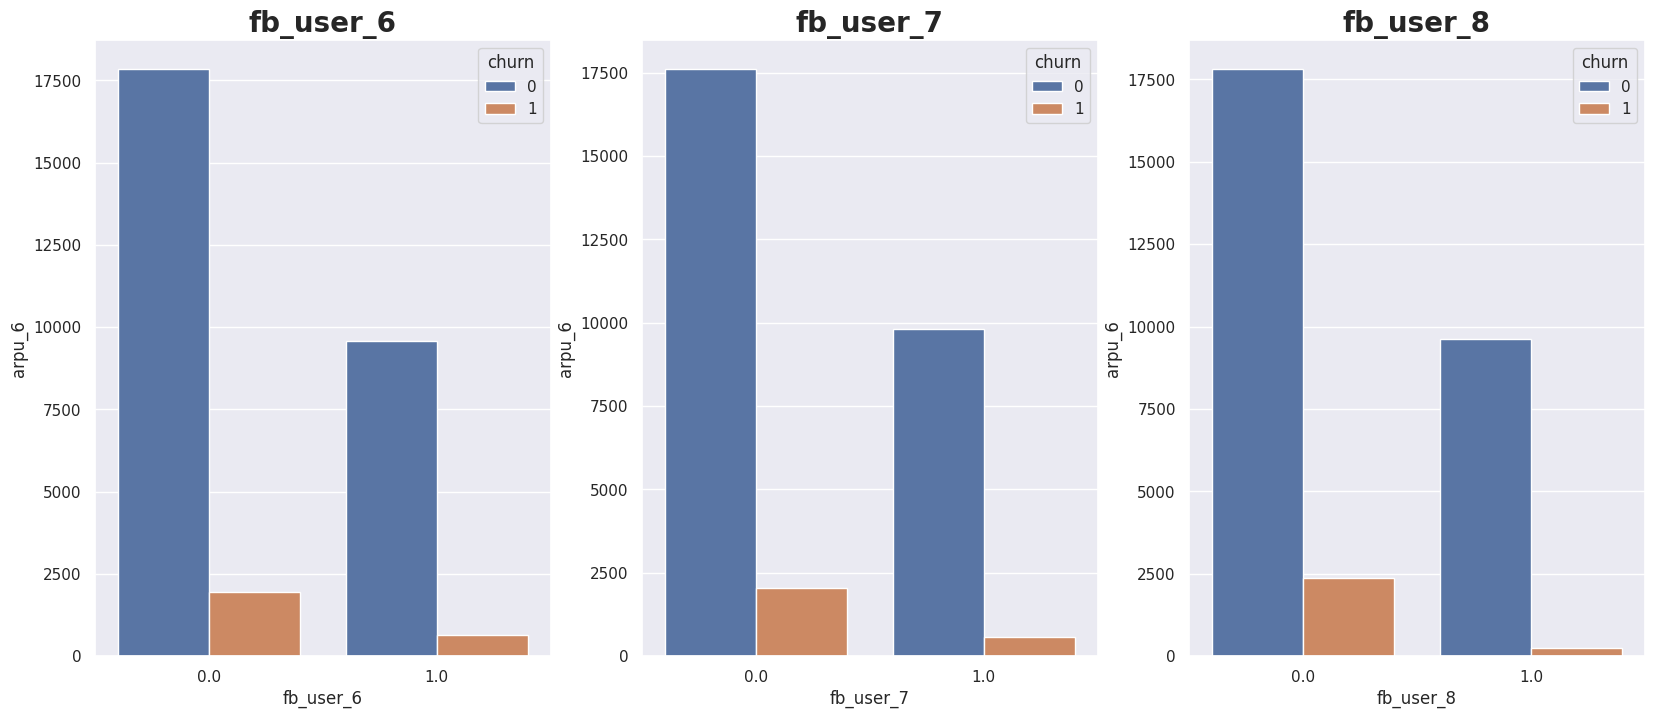

In [ ]:
#Fb users:
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(df.groupby(['fb_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],ax=axes[0])
ax.set_title('fb_user_6',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['fb_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],ax=axes[1])
ax.set_title('fb_user_7',fontweight='bold',size=20)

df_temp= pd.DataFrame(df.groupby(['fb_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],ax=axes[2])
ax.set_title('fb_user_8',fontweight='bold',size=20)
plt.show()

In [ ]:
#Converting dates into date time formt
date_cols=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6','date_of_last_rech_7',
         'date_of_last_rech_8']
for col in date_cols:
    df[col] = pd.to_datetime(df[col],format='%m/%d/%Y',errors='coerce')

In [ ]:
df['date_of_last_rech_dow_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)
df['date_of_last_rech_dow_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)
df['date_of_last_rech_dow_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)
df['date_of_last_rech_data_dow_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.fillna(7).astype(int).astype(str)
df['date_of_last_rech_data_dow_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.fillna(7).astype(int).astype(str)
df['date_of_last_rech_data_dow_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.fillna(7).astype(int).astype(str)

In [ ]:
#Latest recharge date:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df['last_rech_date'] = df[cols].max(axis=1)
#Number of days:
df['days_since_last_rech'] = np.floor((pd.to_datetime('2014-08-31',format='%Y-%m-%d') - df['last_rech_date'] ).astype('timedelta64[D]'))
#If 0, not present in any column
df['rech_weightage'] = len(cols) - (df[cols].isnull().sum(axis=1))
df.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

#Latest recharge data date:
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df['last_rech_data_date'] = df[cols].max(axis=1)
#Number of days:
df['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31',format='%Y-%m-%d') - df['last_rech_data_date'] ).astype('timedelta64[D]'))
df['days_since_last_data_rech'] = df['days_since_last_data_rech'].fillna(0)

#If 0, not present in any column:
df['rech_data_weightage'] = len(cols) - (df[cols].isnull().sum(axis=1))
df.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)


In [ ]:
#Separate into 3 lists:
#catg list contains columns representing categorical features related to telecom services.
catg =['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',
       'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',
       'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',
       'date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','monthly_2g_8','sachet_2g_8',
       'monthly_3g_8','sachet_3g_8','fb_user_8']
#catg1 list is a subset of the catg list, focusing on specific categorical features for months 6, 7, and 8.
catg1 =['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7',
       'date_of_last_rech_dow_6','date_of_last_rech_dow_7','date_of_last_rech_data_dow_6','date_of_last_rech_data_dow_7',
       'date_of_last_rech_dow_8','date_of_last_rech_data_dow_8','night_pck_user_8','monthly_2g_8','sachet_2g_8',
       'monthly_3g_8','sachet_3g_8','fb_user_8']
#num_col list contains all the numerical features.
num_col = list(set(df.columns).difference(set(catg)))

In [ ]:
#Filtering and averaging of column with "_6" and "_7":
#Numerical values only:
col_list = df.select_dtypes(include=['float64','int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['og_others_6'],axis=1).columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    col_name = 'avg67_'+col
    c6 = col+'_6'
    c7 = col+'_7'
    df[col_name] = round((df[c6]  + df[c7])/ 2,2)

In [ ]:
#"_8" columns - "avg67_":
c1 = df.select_dtypes(include=['float64','int64']).filter(regex='avg67_').columns
c2 = df.select_dtypes(include=['float64','int64']).filter(regex='_8').drop(['fb_user_8','night_pck_user_8'],axis=1).columns
for col1,col2 in zip(c1,c2):
    col_name=col2[:-2]+'_avgdiff8'
    df[col_name]=df[col2]-df[col1]

In [ ]:
col_list = df.select_dtypes(include=['float64','int64']).filter(regex='_6|_7').drop(catg[:12],axis=1).drop(['og_others_6'],axis=1).columns
df.drop(col_list,axis=1,inplace=True)
num_col = list(set(df.columns).difference(set(catg)))

**Creating dummy variables:**

In [ ]:
dummy_df=pd.get_dummies(df[catg],drop_first=True)
df=pd.concat([df,dummy_df],axis=1)
df= df.drop(catg,axis=1)

In [ ]:
X = df.drop("churn", axis=1)#Independent variable so no churn.
y = df["churn"]#Output variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(24008, 285) (6003, 285)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X = scaler.fit_transform(X_test)

In [ ]:
#Logistic regression:
log_reg= LogisticRegression(random_state=42,class_weight='balanced')
log_reg.fit(X_train,y_train) #fitting model
y_test_pred=log_reg.predict(X_test) #model prediction
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5476
           1       0.48      0.36      0.41       527

    accuracy                           0.91      6003
   macro avg       0.71      0.66      0.68      6003
weighted avg       0.90      0.91      0.90      6003



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
